In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/model_input.csv')
df = df[df['total_charges'] > 0].copy()
df['log_total_charges'] = np.log1p(df['total_charges'])

### Define LOS Segments

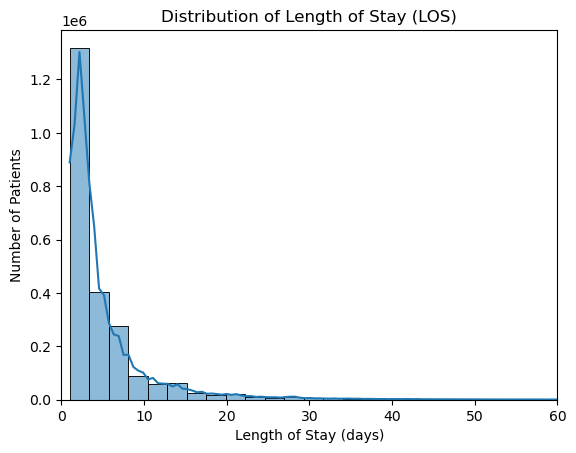

In [3]:
sns.histplot(df['los'], bins=50, kde=True)
plt.title("Distribution of Length of Stay (LOS)")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Number of Patients")
plt.xlim(0, 60)  # Optional: cap to ignore long-tail
plt.show()

## Interpretation: Length of Stay (LOS) Distribution
	•	The vast majority of patients stay between 1 and 7 days.
	•	There’s a sharp drop-off after day 7, and a long tail extending beyond 20–30 days.
	•	Very few patients stay beyond 30 days — this confirms extreme skew.

In [ ]:
# Bin Length of Stay into interpretable categories
df['los_group'] = pd.cut(
    df['los'],
    bins=[0, 3, 7, 14, df['los'].max()],
    labels=['short', 'moderate', 'long', 'extended'],
    right=True
)